# CNNs for Intrusion Detection

###### (work in progress)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving finaldata.csv to finaldata.csv


#### Data Exploration

In [ ]:
df=pd.read_csv('finaldata.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [ ]:
df['labels'] = df['class']
df = df.drop('class', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

How many classes and how many values per class:

number of classes: 2



anomaly    12833
normal      9711
Name: labels, dtype: int64

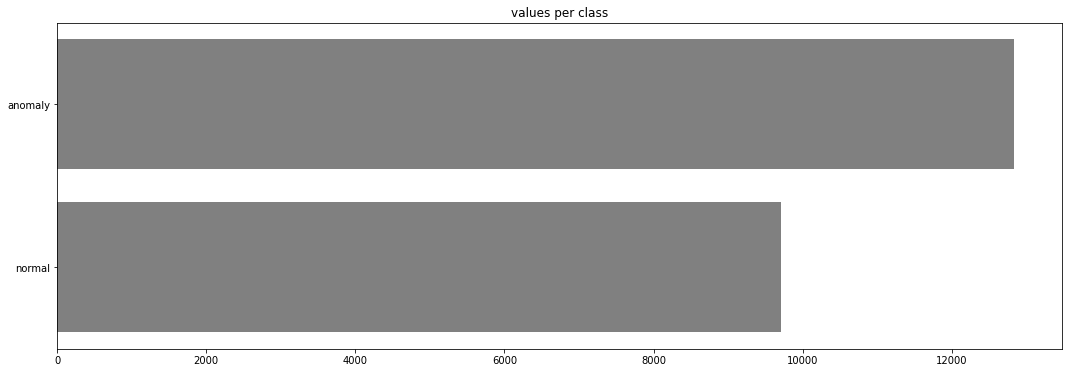

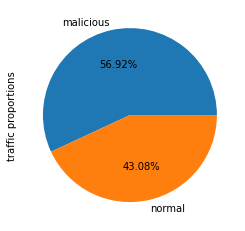

In [ ]:
print('number of classes:', df['labels'].nunique())
print('')
label_counts = df['labels'].value_counts()
plt.figure(figsize=(18,6));
sns.barplot(y=label_counts.index, x=label_counts.values, color='Grey');
plt.title('values per class');
display(label_counts)

#binary traffic proportions
binary_class = []
for label in df['labels']:
    if label !='normal':
        binary_class.append('malicious')
    else:
        binary_class.append('normal')
binary_class = pd.Series(binary_class)
plt.figure()
binary_class.value_counts().plot(kind='pie', label='traffic proportions', autopct='%.2f%%' );

Unique values and value counts of categorical variables:

In [ ]:
df['protocol_type'].value_counts()

tcp     18880
udp      2621
icmp     1043
Name: protocol_type, dtype: int64

In [ ]:
df['service'].value_counts()

http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: service, Length: 64, dtype: int64

In [ ]:
#how many different categories in column 'service'
print('number of categories in column \'service\':', df['service'].nunique())

number of categories in column 'service': 64


In [ ]:
df['flag'].value_counts()

SF        14875
REJ        3850
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: flag, dtype: int64

Numerical features--> summary statistics, distribution boxenplots (per class), feature means (per class), and correlation heatmap:

In [ ]:
numeric_columns = []
categorical_columns = []
for column in df.columns:
    if df[column].dtype != 'object':
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

categorical_columns = categorical_columns[:-1]       
labels=df['labels'].unique()

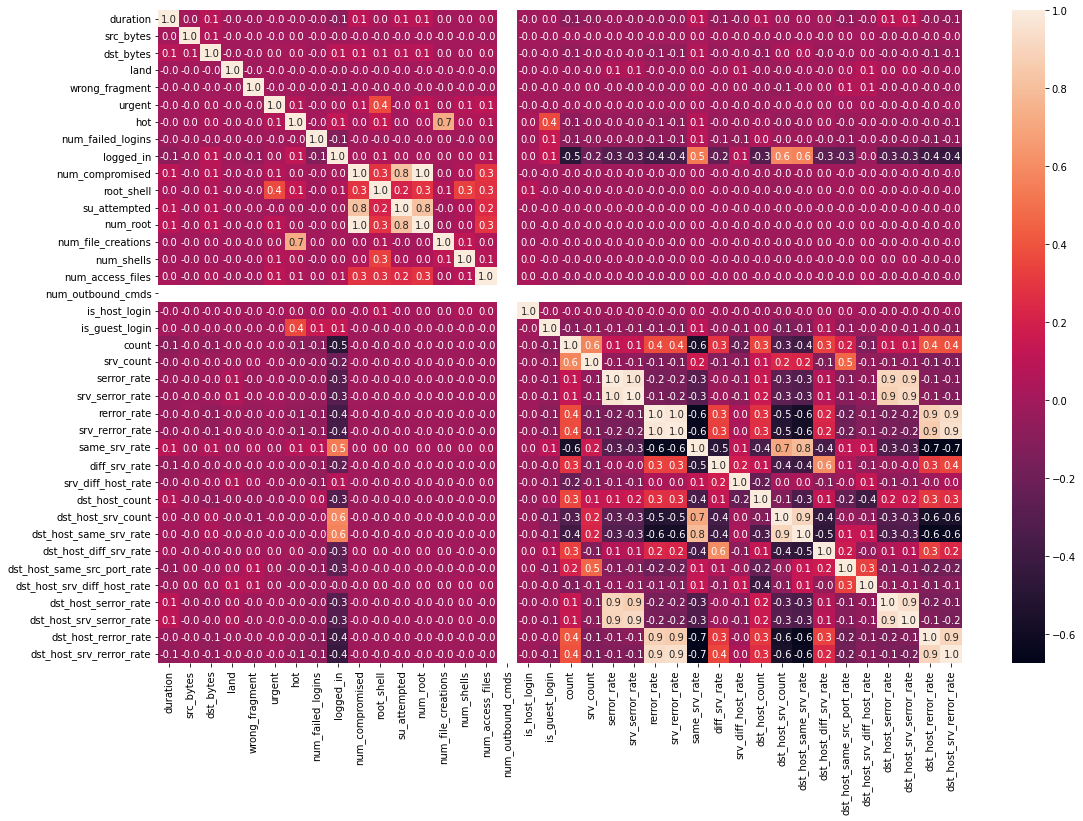

In [ ]:
#correlation heatmap
plt.figure(figsize=(18,12));
sns.heatmap(df.corr(), annot=True, fmt='1.1f');

In [ ]:
#column 'num_outbound_cmds' is zero everywhere, we will delete it
df.drop(columns='num_outbound_cmds', inplace=True)

#remove from list of numeric columns
numeric_columns.remove('num_outbound_cmds')

PCA visualization:

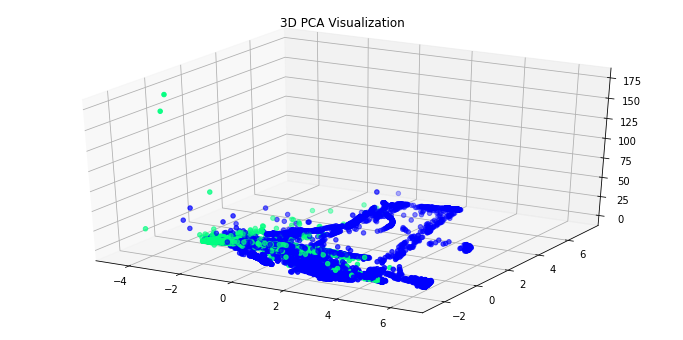

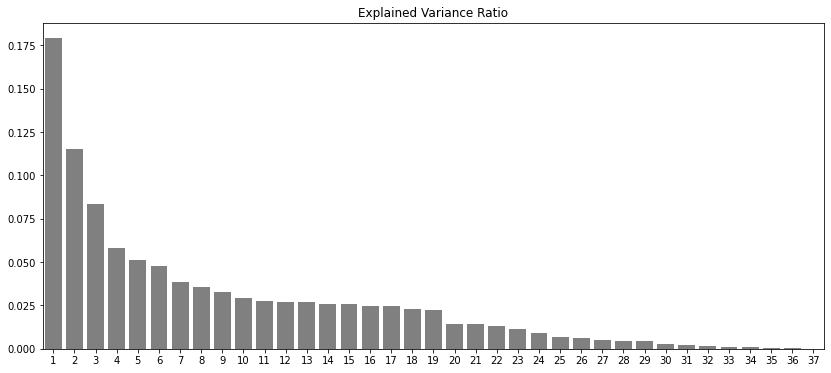

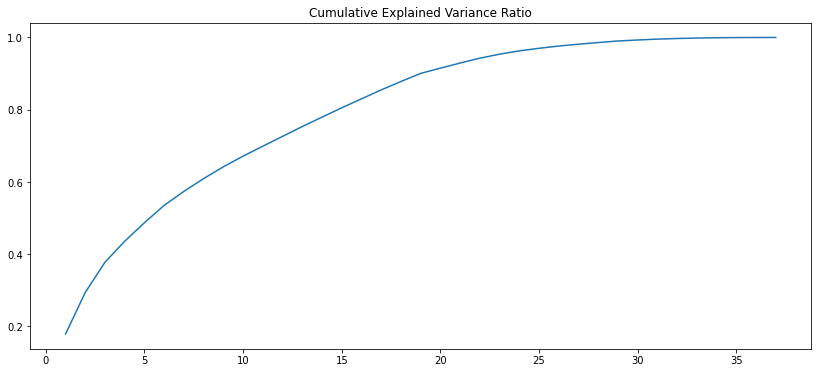

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

#standardize data
df_num = df[numeric_columns].copy()
sc = StandardScaler()
df_num = sc.fit_transform(df_num)

#ordinalize labels
ordinal = OrdinalEncoder()
ord_labels = ordinal.fit_transform(df['labels'].values[:,np.newaxis])
ord_labels = np.squeeze(ord_labels.astype(int))

#PCA
pca = PCA()
df_pca = pca.fit_transform(df_num)

#PCA 3d-scatterplot
plt.figure(figsize=(12,6));
ax=plt.axes(projection='3d')
ax.scatter(df_pca[:,0], df_pca[:,1], df_pca[:,2], 
           c=ord_labels, cmap='winter');
plt.title('3D PCA Visualization');

#explained variance
var_index = np.arange(pca.explained_variance_.shape[0])+1
plt.figure(figsize=(14,6));
sns.barplot(x=var_index, y=pca.explained_variance_ratio_, color='gray');
plt.title('Explained Variance Ratio');
plt.figure(figsize=(14,6));
sns.lineplot(x=var_index, y=pca.explained_variance_ratio_.cumsum());
plt.title('Cumulative Explained Variance Ratio');

Time series graph

,class,label
0,anomaly,0
1,normal,1


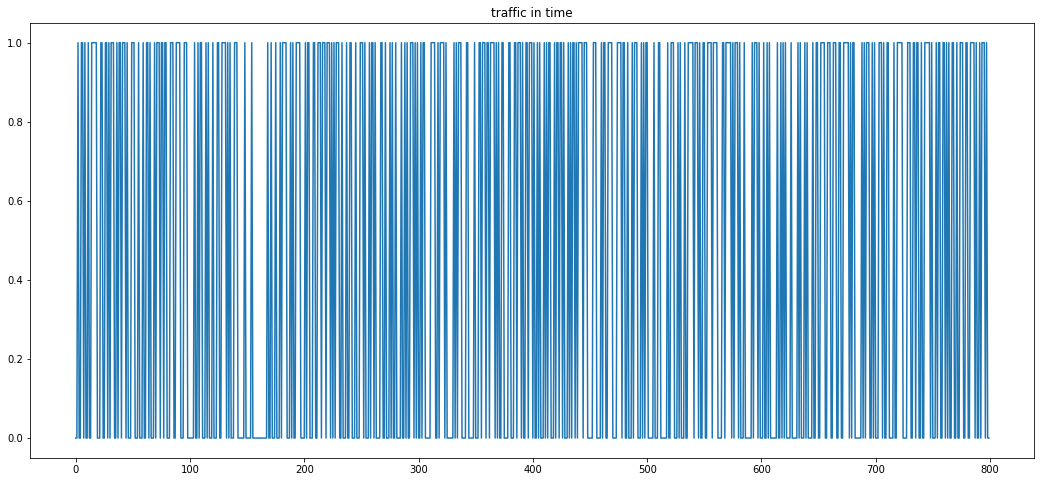

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(df['labels'])
x = np.arange(y.shape[0])

plt.figure(figsize=(18,8));
sns.lineplot(x=x[:800], y=y[:800]); #for visual clarity, only a small slice is selected
plt.title('traffic in time')

class_labels = pd.DataFrame(data=enc.classes_,columns=['class'])
class_labels['label'] = np.unique(y)
display(class_labels)

### CNN Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout
#from tensorflow.keras.layers.core import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
#from tensorflow.keras.metrics import 

In [ ]:
from sklearn.preprocessing import StandardScaler

dummies = pd.get_dummies(df[categorical_columns])
x = pd.concat((df[numeric_columns], dummies), axis=1).values

enc_bin = LabelEncoder()
y_bin = enc_bin.fit_transform(binary_class)
enc_multi = LabelEncoder()
y_multi = enc_multi.fit_transform(df['labels'].values)

# for manual train_test_split, splitting indices instead of actual values
np.random.RandomState(seed=0)
train_indexes = np.random.choice(np.arange(x.shape[0]), size=x.shape[0]*8//10, replace=False)
test_indexes = np.delete(np.arange(x.shape[0]), np.arange(x.shape[0])[train_indexes])
print('train size:', train_indexes.shape[0])
print('test size:  ', test_indexes.shape[0])

x_tr = x[train_indexes]
x_ts = x[test_indexes]
y_bin_tr =y_bin[train_indexes]
y_bin_ts =y_bin[test_indexes]
y_multi_tr = y_multi[train_indexes]
y_multi_ts = y_multi[test_indexes]

# scale x
sc=StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_ts = sc.transform(x_ts)

#make x 3-dimensional for the CNN to process
x_tr = x_tr[:,:,np.newaxis]
x_ts = x_ts[:,:,np.newaxis]

train size: 18035
test size:   4509


##### Binary Classification

In [ ]:
model=Sequential()
model.add(Conv1D(128,2, activation='relu',input_shape=x_tr[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(256,2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 114, 128)          384       
                                                                 
 batch_normalization (BatchN  (None, 114, 128)         512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 57, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 57, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 56, 256)           65792     
                                                                 
 batch_normalization_1 (Batc  (None, 56, 256)          1

In [ ]:
early_stop = EarlyStopping(patience=5,verbose=1)
model.fit(x_tr, y_bin_tr, epochs=50, validation_split=0.1, batch_size=16, callbacks=[early_stop])

Epoch 1/50
1015/1015 [==============================] - 42s 39ms/step - loss: 0.2280 - accuracy: 0.9305 - val_loss: 0.1112 - val_accuracy: 0.9534
Epoch 2/50
1015/1015 [==============================] - 36s 35ms/step - loss: 0.1208 - accuracy: 0.9500 - val_loss: 0.0955 - val_accuracy: 0.9601
Epoch 3/50
1015/1015 [==============================] - 35s 34ms/step - loss: 0.1062 - accuracy: 0.9584 - val_loss: 0.0873 - val_accuracy: 0.9645
Epoch 4/50
1015/1015 [==============================] - 36s 35ms/step - loss: 0.0939 - accuracy: 0.9606 - val_loss: 0.1006 - val_accuracy: 0.9629
Epoch 5/50
1015/1015 [==============================] - 36s 36ms/step - loss: 0.0896 - accuracy: 0.9625 - val_loss: 0.0898 - val_accuracy: 0.9662
Epoch 6/50
1015/1015 [==============================] - 35s 35ms/step - loss: 0.0896 - accuracy: 0.9625 - val_loss: 0.0807 - val_accuracy: 0.9723
Epoch 7/50
1015/1015 [==============================] - 36s 35ms/step - loss: 0.0854 - accuracy: 0.9647 - val_loss: 0.0785 -

In [ ]:
pred = model.predict(x_ts)
pred_d = []
for prediction in pred:
    if prediction <0.5:
        pred_d.append(0)
    else:
        pred_d.append(1)
        
pred = np.array(pred_d)
print('accuracy:', accuracy_score(y_bin_ts, pred))
print('f1-score:', f1_score(y_bin_ts, pred, average='macro'))

accuracy: 0.975160789532047
f1-score: 0.9745879181705684


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2568
           1       0.98      0.96      0.97      1941

    accuracy                           0.98      4509
   macro avg       0.98      0.97      0.97      4509
weighted avg       0.98      0.98      0.98      4509



Text(42.0, 0.5, 'Truth')

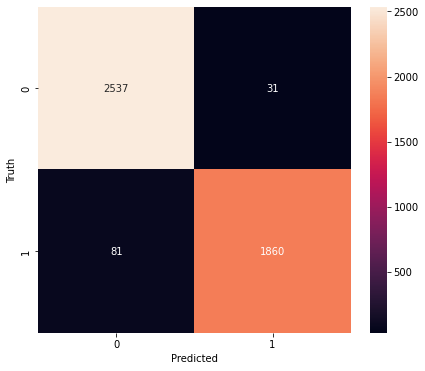

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(classification_report(y_bin_ts,pred))
cm = tf.math.confusion_matrix(y_bin_ts, pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

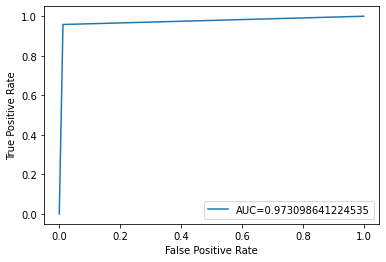

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_bin_ts,pred)
auc = metrics.roc_auc_score(y_bin_ts,pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# create our target classifications
from sklearn.model_selection import train_test_split
le = LabelEncoder()
X = df.drop('labels', axis=1)
y = le.fit_transform(df['labels'])
df_num = df[numeric_columns].copy()
df_num = sc.fit_transform(df_num)
df_num = pca.fit_transform(df_num)
# build the training sets
X_train, X_test, y_train, y_test = train_test_split(df_num, y, test_size=0.2)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)

# calculate and display our base accuracty
lda_score = accuracy_score(lda_predictions,y_test)
lda_score

0.8744732756708805

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2524
           1       0.81      0.92      0.87      1985

    accuracy                           0.87      4509
   macro avg       0.87      0.88      0.87      4509
weighted avg       0.88      0.87      0.87      4509



Text(42.0, 0.5, 'Truth')

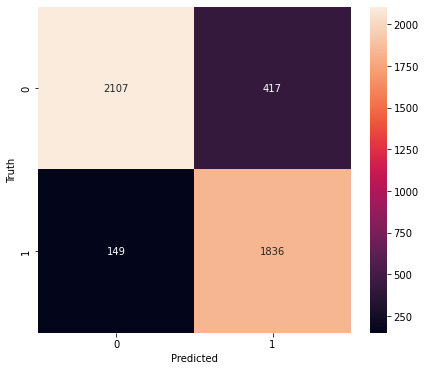

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(classification_report(y_test,lda_predictions))
cm = tf.math.confusion_matrix(y_test, lda_predictions)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

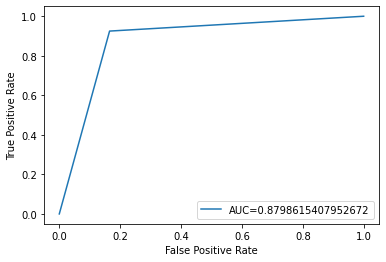

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,lda_predictions)
auc = metrics.roc_auc_score(y_test,lda_predictions)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()